In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics as m
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp

from catboost import CatBoostClassifier
from sentence_transformers import SentenceTransformer


In [49]:
df = pd.read_csv("df_pp_stem_lemm.csv")

In [50]:
df = df.drop('Unnamed: 0',axis=1)
df.shape

(3184, 12)

In [51]:
df.sample(5)

,sentiment,okpd_2,name,number,fz,date,preproccessed_name,preproccessed_okpd_2,preproccessed_name_stem,preproccessed_okpd_2_stem,preproccessed_name_lemm,preproccessed_okpd_2_lemm
424,0,62.03.12.130: Услуги по сопровождению компьюте...,Оказание консультационных услуг по ведению бух...,№0372200146623000026,44,18.08.2023,оказание консультационных услуг по ведению бух...,услуги по сопровождению компьютерных систем,оказан консультацион услуг веден бухгалтерск у...,услуг сопровожден компьютерн сист,оказание консультационный услуга ведение бухга...,услуга сопровождение компьютерный система \n
69,0,62.09.20.190: Услуги по технической поддержке ...,№66 Оказание услуг по сопровождению Электронно...,№32312698270,223,23.08.2023,оказание услуг по сопровождению электронного ...,услуги по технической поддержке в области инф...,оказан услуг сопровожден электрон периодическ ...,услуг техническ поддержк област информацион те...,оказание услуга сопровождение электронный пери...,услуга технический поддержка область информаци...
1863,0,62.09.20.120: Услуги по установке программного...,Продление неисключительных пользовательских пр...,№32312732605,223,04.09.2023,продление неисключительных пользовательских пр...,услуги по установке программного обеспечения,продлен неисключительн пользовательск прав про...,услуг установк программн обеспечен,продление неисключительный пользовательский пр...,услуга установка программный обеспечение \n
2652,0,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по предоставлению сертификатов ...,№0103200008423002612,44,10.08.2023,оказание услуг по предоставлению сертификатов ...,услуги по технической поддержке информационны...,оказан услуг предоставлен сертификат техническ...,услуг техническ поддержк информацион технолог,оказание услуга предоставление сертификат техн...,услуга технический поддержка информационный те...
1660,0,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по технической поддержке и сопр...,№0173200001423001383,44,06.09.2023,оказание услуг по технической поддержке и сопр...,услуги по технической поддержке информационны...,оказан услуг техническ поддержк сопровожден се...,услуг техническ поддержк информацион технолог,оказание услуга технический поддержка сопровож...,услуга технический поддержка информационный те...


In [4]:
sent_transformer = SentenceTransformer("sentence-transformers/paraphrase-multilingual-mpnet-base-v2")


No sentence-transformers model found with name sismetanin/rubert-ru-sentiment-rusentiment. Creating a new one with MEAN pooling.


In [5]:
sent = sent_transformer.encode('привет, как дела?')

In [6]:
sent

array([-1.79053947e-01,  5.86881749e-02,  3.11110228e-01, -6.00732923e-01,
        2.51201261e-02, -5.42081892e-01,  7.87643254e-01,  3.61480445e-01,
       -1.44886220e+00, -5.95587373e-01, -2.98276633e-01,  1.09759116e+00,
       -9.99247730e-01, -6.58101439e-01, -5.58842003e-01, -2.12577924e-01,
        6.90495670e-01, -3.09531003e-01,  7.08221793e-01, -8.20516527e-01,
       -1.16534781e+00,  1.40480846e-01, -6.88613951e-01,  3.16436961e-02,
       -1.15803874e+00,  1.86982721e-01, -2.28699166e-02, -8.90776962e-02,
       -2.30467209e-04, -1.11012876e+00,  1.58002809e-01, -5.10181263e-02,
       -1.62138771e-02,  1.03414690e+00,  8.42032015e-01, -1.47324562e-01,
        3.49504739e-01, -4.56815779e-01, -2.33958568e-02,  1.69851348e-01,
        4.09365326e-01,  9.24247444e-01,  3.38172585e-01, -6.43315837e-02,
        5.84537685e-01, -5.19233823e-01,  6.91426933e-01, -7.55181089e-02,
        4.00608242e-01,  5.70579231e-01, -3.02102715e-01, -3.92739862e-01,
       -3.78766477e-01,  

In [54]:
df.dropna(subset=['sentiment'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [55]:
df

,sentiment,okpd_2,name,number,fz,date,preproccessed_name,preproccessed_okpd_2,preproccessed_name_stem,preproccessed_okpd_2_stem,preproccessed_name_lemm,preproccessed_okpd_2_lemm
0,0,62.01.29.000: Оригиналы программного обеспечен...,Предоставление неисключительного права испол...,№0169300040423000063,44,04.09.2023,предоставление неисключительного права исполь...,оригиналы программного обеспечения прочие,предоставлен неисключительн прав использован а...,оригинал программн обеспечен проч,предоставление неисключительный право использо...,оригинал программный обеспечение прочий \n
1,0,62.02.20.190: Услуги консультативные в области...,Предоставление услуг по сопровождению програм...,№0162300011123000065,44,07.09.2023,предоставление услуг по сопровождению програм...,услуги консультативные в области компьютерных...,предоставлен услуг сопровожден программн компл...,услуг консультативн област компьютерн технолог...,предоставление услуга сопровождение программны...,услуга консультативный область компьютерный те...
2,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0122100010223000021,44,18.09.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие,программн средств антивирусн защит,оригинал программн обеспечен проч,программный средство антивирусный защита \n,оригинал программный обеспечение прочий \n
3,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0302300050523000034,44,21.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие,программн средств антивирусн защит,оригинал программн обеспечен проч,программный средство антивирусный защита \n,оригинал программный обеспечение прочий \n
4,0,62.01.29.000: Оригиналы программного обеспечен...,Программное средство антивирусной защиты,№0316400001123000094,44,17.08.2023,программное средство антивирусной защиты,оригиналы программного обеспечения прочие,программн средств антивирусн защит,оригинал программн обеспечен проч,программный средство антивирусный защита \n,оригинал программный обеспечение прочий \n
...,...,...,...,...,...,...,...,...,...,...,...,...
3179,0,62.03.12.130: Услуги по сопровождению компьюте...,Оказание услуг на базе центра обработки данных...,№32312683283,223,17.08.2023,оказание услуг на базе центра обработки данных...,услуги по сопровождению компьютерных систем,оказан услуг баз центр обработк дан включа пре...,услуг сопровожден компьютерн сист,оказание услуга база центр обработка данные вк...,услуга сопровождение компьютерный система \n
3180,0,62.09.20.120: Услуги по установке программного...,Оказание услуг по внедрению «Мобильного прилож...,№32312673844,223,15.08.2023,оказание услуг по внедрению мобильного приложе...,услуги по установке программного обеспечения,оказан услуг внедрен мобильн приложен управлен...,услуг установк программн обеспечен,оказание услуга внедрение мобильный приложение...,услуга установка программный обеспечение \n
3181,0,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по внедрению новых сервисов на ...,№0372200211123000116,44,08.09.2023,оказание услуг по внедрению новых сервисов на ...,услуги по технической поддержке информационны...,оказан услуг внедрен нов сервис баз программн ...,услуг техническ поддержк информацион технолог,оказание услуга внедрение новый сервис база пр...,услуга технический поддержка информационный те...
3182,0,62.02.30.000: Услуги по технической поддержке ...,Оказание услуг по внедрению новых сервисов на ...,№0372200082723000164,44,14.08.2023,оказание услуг по внедрению новых сервисов на ...,услуги по технической поддержке информационны...,оказан услуг внедрен нов сервис баз программн ...,услуг техническ поддержк информацион технолог,оказание услуга внедрение новый сервис база пр...,услуга технический поддержка информационный те...


In [56]:
embeddings = sent_transformer.encode(df['name'],
                                     show_progress_bar=True)

Batches:   0%|          | 0/100 [00:00<?, ?it/s]

In [57]:
df['sentiment'] = df['sentiment'].astype(int)

 TO DO:\
изучить пар-р text_features CatBoost\
 изучить пар-р embedings_features CatBoost

In [58]:
X = df[['name']]
y = df['sentiment']

X_tr, X_v, y_tr, y_v = train_test_split(X,y,test_size=0.2,
                                        random_state=42,
                                        stratify=df['sentiment'])

In [69]:
X_train, X_val, y_train, y_val = train_test_split(embeddings,df['sentiment'],test_size=0.2,
                                                    random_state=42,
                                                    stratify=df['sentiment'])

In [65]:
lr = LogisticRegression(random_state=42,
                           class_weight='balanced')

cb = CatBoostClassifier(random_seed=42, 
                        early_stopping_rounds=15,
                        auto_class_weights='Balanced',
                        depth=7,
                        n_estimators = 2000,
                        )

In [80]:
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=42)

In [71]:
cb.fit(X_train, y_train, eval_set=(X_val, y_val))

Learning rate set to 0.029529
0:	learn: 0.6679551	test: 0.6693730	best: 0.6693730 (0)	total: 276ms	remaining: 9m 10s
1:	learn: 0.6436335	test: 0.6540542	best: 0.6540542 (1)	total: 396ms	remaining: 6m 35s
2:	learn: 0.6216986	test: 0.6386045	best: 0.6386045 (2)	total: 505ms	remaining: 5m 36s
3:	learn: 0.5998116	test: 0.6222067	best: 0.6222067 (3)	total: 616ms	remaining: 5m 7s
4:	learn: 0.5813248	test: 0.6080065	best: 0.6080065 (4)	total: 736ms	remaining: 4m 53s
5:	learn: 0.5612047	test: 0.5912111	best: 0.5912111 (5)	total: 864ms	remaining: 4m 47s
6:	learn: 0.5408205	test: 0.5765386	best: 0.5765386 (6)	total: 987ms	remaining: 4m 40s
7:	learn: 0.5271681	test: 0.5670064	best: 0.5670064 (7)	total: 1.11s	remaining: 4m 37s
8:	learn: 0.5111750	test: 0.5542499	best: 0.5542499 (8)	total: 1.22s	remaining: 4m 30s
9:	learn: 0.4913267	test: 0.5394429	best: 0.5394429 (9)	total: 1.34s	remaining: 4m 26s
10:	learn: 0.4772732	test: 0.5287916	best: 0.5287916 (10)	total: 1.46s	remaining: 4m 23s
11:	learn: 0

In [85]:
text_features

<2547x4551 sparse matrix of type '<class 'numpy.int32'>'
	with 39816 stored elements in Compressed Sparse Column format>

In [86]:
text_data = X_tr['name']

vectorizer = TfidfVectorizer()
text_features = vectorizer.fit_transform(text_data)

text_features = sp.csc_matrix(text_features, dtype=int)

cb_ft = CatBoostClassifier(random_seed=42,  
                        early_stopping_rounds=15,
                        auto_class_weights='Balanced',
                        text_features=[text_features],
                        text_processing='tfidf',
                        depth=7,
                        n_estimators = 2000)

cb_ft.fit(text_features, y_tr, eval_set=((vectorizer.fit_transform(X_v['name']), y_v)))

In [91]:
# обучение
cb_ft.fit(X_tr, y_tr, text_features=[text_features], 
          eval_set=(X_v, y_v, [vectorizer.transform(X_v['name'])]))

# предсказание 
preds = cb_ft.predict(X_val, text_features=[vectorizer.transform(X_val['name'])])


TypeError: unhashable type: 'csc_matrix'

In [ ]:
print(m.classification_report(y_val, lr.predict(X_val)))
print("*"*100)
print(m.roc_auc_score(y_val, lr.predict_proba(X_val)[:, 1]))
print("*"*100)
print((m.confusion_matrix(y_val, lr.predict(X_val))))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       737
           1       0.46      0.80      0.58        60

    accuracy                           0.91       797
   macro avg       0.72      0.86      0.77       797
weighted avg       0.94      0.91      0.92       797

****************************************************************************************************
0.9471732247851651
****************************************************************************************************
[[680  57]
 [ 12  48]]


# изучить как прикрутить compute_metrics

In [ ]:
def compute_metrics(y_true, y_pred):
    accuracy = m.accuracy_score(y_true, y_pred)
    precision = m.precision_score(y_true, y_pred)
    recall = m.recall_score(y_true, y_pred)
    f1 = m.f1_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1

In [ ]:
# Переименуем столбец 'index' в 'Model_name' и создадим новый индекс
df_metrics = df_metrics.rename(columns={'index': 'Model_name'}).set_index('Model_name')
# Преобразуем индекс 'Model_name' в столбец
df_metrics.reset_index(inplace=True)

print(df_metrics)

NameError: name 'df_metrics' is not defined

In [ ]:
accuracy, precision, recall, f1 = compute_metrics(y_val, lr.predict(X_val))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# data = {'Model_name': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
#         'LogReg': [accuracy, precision, recall, f1]}
# df_metrics = (pd.DataFrame(data)).T


df_metrics = pd.DataFrame({'Model_name': ['LogReg'],
 'accuracy': [accuracy],
 'precision': [precision],
 'recall': [recall],
 'f1': [f1]})

Accuracy: 0.9134253450439147
Precision: 0.45714285714285713
Recall: 0.8
F1 Score: 0.5818181818181818


In [ ]:
df_metrics

,Model_name,accuracy,precision,recall,f1
0,LogReg,0.913425,0.457143,0.8,0.581818


In [ ]:
print(m.classification_report(y_val, cb.predict(X_val)))
print("*"*100)
print(m.roc_auc_score(y_val, cb.predict_proba(X_val)[:, 1]))
print("*"*100)
print((m.confusion_matrix(y_val, cb.predict(X_val))))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       737
           1       0.49      0.67      0.56        60

    accuracy                           0.92       797
   macro avg       0.73      0.80      0.76       797
weighted avg       0.94      0.92      0.93       797

****************************************************************************************************
0.9367028493894165
****************************************************************************************************
[[695  42]
 [ 20  40]]


In [ ]:
accuracy, precision, recall, f1 = compute_metrics(y_val, cb.predict(X_val))

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

new_row = pd.DataFrame({'Model_name': ['CatBoost'],
                        'accuracy': [accuracy],
                        'precision': [precision],
                        'recall': [recall],
                        'f1': [f1]})

df_metrics = df_metrics.append(new_row, ignore_index=True)

Accuracy: 0.9222082810539524
Precision: 0.4878048780487805
Recall: 0.6666666666666666
F1 Score: 0.5633802816901409


---

In [ ]:
from transformers import BertForSequenceClassification, BertTokenizer, AutoModel, TrainingArguments, Trainer

In [ ]:
model = BertForSequenceClassification.from_pretrained("DeepPavlov/rubert-base-cased", 
                                                      num_labels=df['sentiment'].nunique())

tokenizer = BertTokenizer.from_pretrained("DeepPavlov/rubert-base-cased")

pytorch_model.bin:   0%|          | 0.00/714M [00:00<?, ?B/s]

c:\Users\Mi\AppData\Local\Programs\Python\Python310\lib\site-packages\huggingface_hub\file_download.py:149: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Mi\.cache\huggingface\hub\models--DeepPavlov--rubert-base-cased. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Some weights of BertForSequenceClassification were not initialized from the model check

<Axes: >

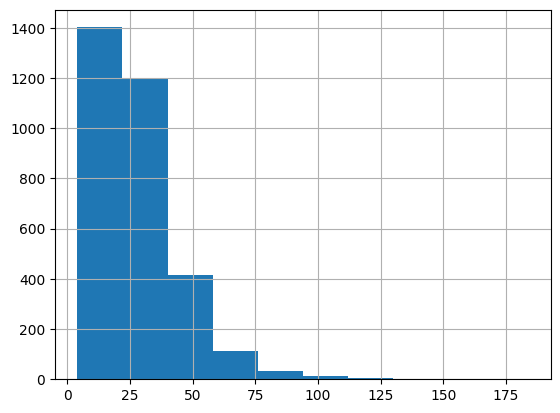

In [ ]:
df['Наименование закупки_x'].apply(lambda x: len(tokenizer.encode(x))).hist()

In [ ]:
tokenized_sample = tokenizer("Привет", 
                             truncation=True, 
                             max_length=128, 
                             padding='max_length'
                             )

In [ ]:
tokenizer.decode(tokenized_sample['input_ids'])

'[CLS] Привет [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [ ]:
tokenized_sample

{'input_ids': [101, 77527, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
from datasets import Dataset

In [ ]:
data = Dataset.from_pandas(df)

In [ ]:
data = data.train_test_split(test_size=0.2)

In [ ]:
def tokenize_function(row):
    return tokenizer(row['Наименование закупки_x'], 
              truncation=True, 
              max_length=128, 
              padding='max_length')

In [ ]:
train = data['train'].map(tokenize_function, batched=True)
test = data['test'].map(tokenize_function, batched=True)

Map:   0%|          | 0/2548 [00:00<?, ? examples/s]

Map:   0%|          | 0/638 [00:00<?, ? examples/s]

In [ ]:
train = train.rename_column("sentiment", "label")
test = test.rename_column("sentiment", "label")

In [ ]:
training_args = TrainingArguments(output_dir="temp",
                                  evaluation_strategy="epoch",
                                  num_train_epochs=5,
                                  save_steps=200,
                                  per_device_eval_batch_size=64,
                                  per_device_train_batch_size=64,
                                  report_to='none')


ImportError: Using the `Trainer` with `PyTorch` requires `accelerate>=0.21.0`: Please run `pip install transformers[torch]` or `pip install accelerate -U`

In [ ]:
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=train,
                  eval_dataset={"TRAIN":train, "VALID":test},
                #   compute_metrics=ServiceCategorizer.compute_metrics,
                #   custom_class_weight=self.class_weights
                  )

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Train Loss,Valid Loss
1,No log,No log,0.013826,0.318432
2,No log,No log,0.019078,0.274241
3,No log,No log,0.003023,0.275034
4,No log,No log,0.000955,0.298922
5,No log,No log,0.000897,0.306704


TrainOutput(global_step=200, training_loss=0.01660379409790039, metrics={'train_runtime': 104.4901, 'train_samples_per_second': 121.925, 'train_steps_per_second': 1.914, 'total_flos': 838008711321600.0, 'train_loss': 0.01660379409790039, 'epoch': 5.0})

In [ ]:
preds = trainer.predict(test)

In [ ]:
from torch.nn import Sigmoid
import torch

In [ ]:
test_probas = torch.sigmoid(torch.from_numpy(preds.predictions[:, 1]))

In [ ]:
test_labels = test_probas.numpy() > 0.5
test_labels = test_labels.tolist()

In [ ]:
print(m.classification_report(test['label'], test_labels))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       589
           1       0.76      0.63      0.69        49

    accuracy                           0.96       638
   macro avg       0.86      0.81      0.83       638
weighted avg       0.95      0.96      0.95       638



In [ ]:
### TO DO:
# изучить пар-р text_features CatBoost
# изучить пар-р embedings_features CatBoost
# изучить как прикрутить compute_metrics
# изучить как прокинуть class_weight в Trainer ***
# Попробовать в токенизатор прикрутить дополнительную текстовую информацию
# Изучить и применить BERTopic (это отдельная библиотека для кластеризации , очень наглядно)
# To be cont....